# Book Recommendation System Overview

This notebook details the creation and implementation of a book recommendation system. Our approach utilizes item-based collaborative filtering, leveraging cosine similarity to understand and suggest books based on user preferences and ratings. Here's a breakdown of the key components:

1. Data Preparation: We start by assembling a dataset comprising books and user ratings. This dataset forms the foundation for our analysis and similarity calculations.

2. Cosine Similarity Calculation: We compute the cosine similarity among books to measure how similar they are in terms of user ratings. This involves transposing our initial DataFrame to align books along the rows and then applying the cosine similarity function.

3. Similarity DataFrame Creation: We create a DataFrame (similarity_df) that encapsulates the cosine similarity scores between each pair of books. This DataFrame is instrumental in identifying books with high degrees of similarity.

4. Interactive Visualization with Plotly: For an intuitive understanding of the similarity relationships, we employ Plotly to create an interactive heatmap. This visualization aids in easily identifying books that are closely related in terms of user ratings.

5. Recommendation Function: We define a function to recommend books based on a specific title. The function utilizes our similarity DataFrame to find and suggest books that share the most resemblance in user ratings.

Through these steps, we aim to provide personalized book recommendations that align closely with user interests and preferences.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the pandas library for data manipulation and the cosine_similarity function for similarity calculation

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Example DataFrame (User ratings for books)
ratings = {
    'Harry Potter': [5, 4, 3, 5, 4],
    'Lord of the Rings': [4, 5, 2, 3, 4],
    'Game of Thrones': [3, 3, 5, 4, 3],
    # Add ratings for other books if you need
}
books_df = pd.DataFrame(ratings)

In [4]:
books_df

,Harry Potter,Lord of the Rings,Game of Thrones
0,5,4,3
1,4,5,3
2,3,2,5
3,5,3,4
4,4,4,3


In [8]:
books_df.T

,0,1,2,3,4
Harry Potter,5,4,3,5,4
Lord of the Rings,4,5,2,3,4
Game of Thrones,3,3,5,4,3


In [5]:
# Calculate cosine similarity between items
cosine_sim = cosine_similarity(books_df.T)

In [7]:
cosine_sim

array([[1.        , 0.96476382, 0.94071175],
       [0.96476382, 1.        , 0.88415083],
       [0.94071175, 0.88415083, 1.        ]])

In [10]:
# Create DataFrame for item similarities
similarity_df = pd.DataFrame(cosine_sim, index=books_df.columns, columns=books_df.columns)
similarity_df

,Harry Potter,Lord of the Rings,Game of Thrones
Harry Potter,1.000000,0.964764,0.940712
Lord of the Rings,0.964764,1.000000,0.884151
Game of Thrones,0.940712,0.884151,1.000000


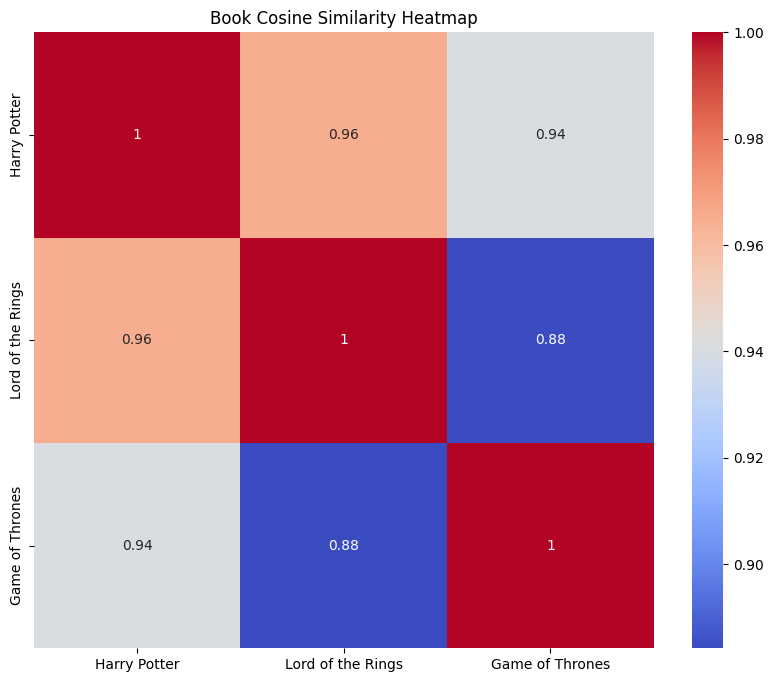

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap of similarity scores
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm')
plt.title('Book Cosine Similarity Heatmap')
plt.show()


In [14]:
!pip install plotly

In [15]:
import plotly.express as px

# Create Heatmap useing plotly
fig = px.imshow(similarity_df,
                labels=dict(x="Book", y="Book", color="Cosine Similarity"),
                x=similarity_df.columns,
                y=similarity_df.columns
               )
fig.update_layout(title='Book Cosine Similarity Heatmap')
fig.show()


In [11]:
# Function to recommend books based on a specific book
def recommend_book(book_title, similarity_data, items):
    # Retrieve similar scores for given book
    similar_scores = similarity_data[book_title]
    # Sort scores in descending order
    similar_scores = similar_scores.sort_values(ascending=False)
    # Return top 3 similar books, excluding the book itself
    return similar_scores[similar_scores != 1.0].head(3)


In [12]:
# Recommend books similar to a specific book (e.g., 'Harry Potter')
recommendations = recommend_book('Harry Potter', similarity_df, books_df.columns)
print(recommendations)

Lord of the Rings    0.964764
Game of Thrones      0.940712
Name: Harry Potter, dtype: float64
